In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math,time
import random 
import numpy.random as rd
from decimal import Decimal, ROUND_DOWN
from IPython import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.backends.backend_pdf import PdfPages

"""variable"""
N = 9 #nuber of individuals
W_dis = 100 #wight of distance
W_soc = 0.1 #weight of social affiliation
a = 0.001 #probabilty to chage state sponteniously
itr = 500 #number of interation of simulation 
x1 = np.array(range(N))

"""initial condition"""
state = np.ones(shape=(N,1)) ##iniitial state
depart = random.randint(0,N-1)  ## First departure
state[depart,0] = 0

"""empty list for results"""
num_ind = np.array([])
phi_distance = np.array([])
soc_distance = np.array([])

"""function"""
def distance(X,Y):
    """function for calculate distance among individuals"""
    res = np.zeros(shape=(N,N))
    for i in range(N):
        r_dis = np.array([])
        xdis = X-X[i]
        ydis = Y-Y[i]
        r_dis = (xdis**2+ydis**2)**0.5
        res[i,0:N] = r_dis

    return res


def softmax(Z):
    """softmax fuction"""
    return np.exp(Z)/np.sum(np.exp(Z))

def pro(A,B,S):
    """compute probabtility to be next"""
    res_p = np.zeros(shape=(N,1))
    k = (W_dis*A+W_soc*B)*S

    for i in range(N):
        p = np.sum(k[i,:])
        res_p[i,0] = p

    prob = softmax(res_p+a)
    return prob

"""social affiliation"""
soc_data = pd.read_csv('/Users/sotainoue1/Desktop/Study/departure/probability/soc_mat.csv',sep=",")
res_soc = np.array
res_soc = data.values
res_soc = res_soc[:,1:10]
#xsoc = np.random.uniform(0,20,N)
#ysoc = np.random.uniform(0,20,N)

#res_soc = np.zeros(shape=(N,N))

#res_soc = distance(xsoc,ysoc)


"""simulation"""
#stdsc = StandardScaler()
mmsc = MinMaxScaler()

for t in range(itr):
    """initial condition"""
    state = np.ones(shape=(N,1)) ##iniitial state
    depart = random.randint(0,N-1)  ## First departure
    state[depart,0] = 0
 
    """distance"""
    xpos = np.random.uniform(0,20,N)
    ypos = np.random.uniform(0,20,N)

    res_dist = np.zeros(shape=(N,N))

    res_dist = distance(xpos,ypos)
    

    """show initial position"""
    #plt.scatter(xpos,ypos,c="red")
    #plt.scatter(xpos[depart],ypos[depart],c="blue")
    #plt.show()

    for k in range(N):

        #time.sleep(0.1)
        #print(np.reshape(state,(1,N)))
        if k == 0:
            pre_ind = depart
        else :
            pre_ind = Next
            
        #res_dist = stdsc.fit_transform(res_dist) #standardization
        #res_soc = stdsc.fit_transform(res_soc)

        res_dist = mmsc.fit_transform(res_dist) #standardization
        res_soc = mmsc.fit_transform(res_soc)
        
        prob = pro(res_dist,res_soc,state)  #calculate probaility to change state

        prob = np.reshape(prob,(1,N))
        prob = prob[0,:]
        Next = rd.choice(N, 1, p=prob) #select next one from the probalitiy 
        state[Next,0] = 0 #change state


        xT = np.reshape(xpos,(N,1))  
        yT = np.reshape(ypos,(N,1))

        xnew = xT*state #following state, indivi
        ynew = yT*state

        #show plot of each individual's state 
        #plt.clf()
        #plt.scatter(xpos,ypos,c="blue", s=50) #blue is departed individuals
        #plt.scatter(xnew,ynew,c="red", s=50) #red is undeparted individuals 
        #display.display(plt.gcf())
        #display.clear_output(wait=True)

        sum_ind_state = N - np.sum(state)
        num_ind = np.append(num_ind,sum_ind_state) 
        phi_dist = res_dist[pre_ind,Next]
        phi_distance = np.append(phi_distance,phi_dist)
        soc_dist = res_soc[pre_ind,Next]
        soc_distance = np.append(soc_distance,soc_dist)
    


/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: Runtime

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/sit

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/sit

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/sit

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-pack

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-pack

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/sit

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/sit

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/sit

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/sit

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/sit

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/sit

/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/Users/sotainoue1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in less
/Users/sotainoue1/anaconda3/lib/python3.7/site-pack

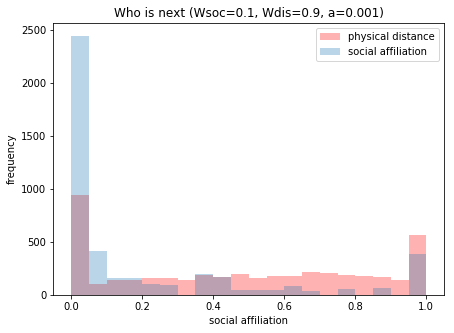

In [168]:
xx = range(itr*N)

fig = plt.figure(figsize=(7,5))
plt.hist(phi_distance,bins=20,color="red",alpha=0.3)
plt.xlabel("physical distance")
plt.ylabel("frequency")

plt.hist(soc_distance,bins=20,alpha=0.3)
plt.xlabel("social affiliation")
plt.ylabel("frequency")
#plt.show()
plt.legend(['physical distance','social affiliation'])
plt.title("Who is next (Wsoc=0.1, Wdis=0.9, a=0.001)")
#plt.show()

plt.savefig("result.png",dpi=300)


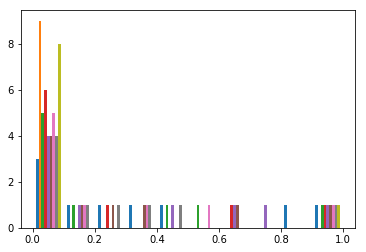

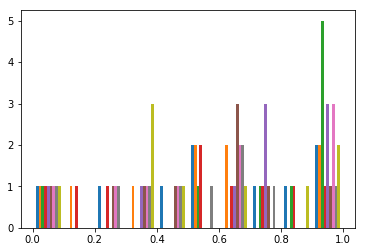

In [173]:
plt.hist(res_soc)
plt.show()
plt.hist(res_dist)
plt.show()